In [1]:
!pip install torch torchvision pandas matplotlib

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [24]:
# importing the necessary libraries
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

In [25]:
# Load the pre-trained object detection model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [26]:
# COCO classes
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A',
    'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut',
    'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A',
    'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'male', 'female'
]

In [27]:
# Function to load and preprocess the image
def load_image(image_path):
    image = Image.open(image_path)
    transform = T.Compose([T.ToTensor()])
    return transform(image)

In [28]:
# Function to perform object detection
def detect_objects(model, image_tensor):
    with torch.no_grad():
        predictions = model([image_tensor])
    return predictions[0]

In [29]:
# Function to process the predictions and generate a summary table
def generate_summary(predictions, threshold=0.5):
    labels = predictions['labels']
    boxes = predictions['boxes']
    scores = predictions['scores']

    summary_data = []
    for i in range(len(scores)):
        if scores[i] >= threshold:
            summary_data.append({
                'Object': COCO_INSTANCE_CATEGORY_NAMES[labels[i].item()],
                'Score': scores[i].item(),
                'Box': boxes[i].tolist()
            })

    summary_df = pd.DataFrame(summary_data)
    return summary_df

In [30]:
# Function to display the image with detected objects
def display_image_with_boxes(image_path, predictions, threshold=0.5):
    image = Image.open(image_path)
    plt.figure(figsize=(12, 8))
    plt.imshow(image)

    ax = plt.gca()
    for i in range(len(predictions['scores'])):
        if predictions['scores'][i] >= threshold:
            box = predictions['boxes'][i].tolist()
            rect = plt.Rectangle(
                (box[0], box[1]), box[2] - box[0], box[3] - box[1],
                fill=False, color='red', linewidth=2
            )
            ax.add_patch(rect)
            label = COCO_INSTANCE_CATEGORY_NAMES[predictions['labels'][i].item()]
            plt.text(box[0], box[1], f'{label}', color='white', backgroundcolor='red')

    plt.axis('off')
    plt.show()

Saving img1.jpeg to img1 (2).jpeg
Summary Table:
  Object     Score                                                Box
0    dog  0.999229  [129.5566864013672, 12.67910099029541, 203.571...
1    dog  0.993636  [12.541739463806152, 18.840761184692383, 94.49...
2    cat  0.989830  [88.63528442382812, 59.673316955566406, 131.81...
3    dog  0.980945  [240.375, 14.505380630493164, 316.477752685546...
4    dog  0.772620  [197.95611572265625, 54.880733489990234, 251.3...
5    cat  0.745616  [199.91159057617188, 58.305213928222656, 251.7...
6    dog  0.536103  [30.392127990722656, 17.907882690429688, 161.0...


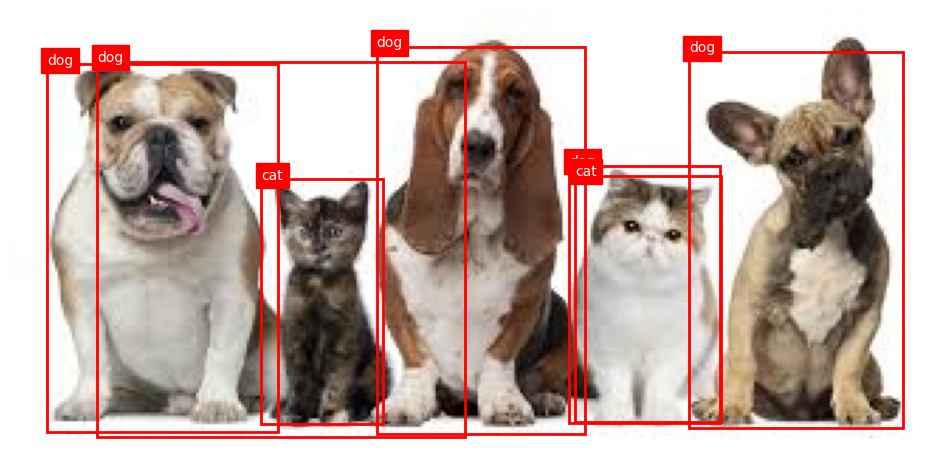

In [16]:
# Upload an image
uploaded = files.upload()
# Process the uploaded image
for image_path in uploaded.keys():
    image_tensor = load_image(image_path)
    predictions = detect_objects(model, image_tensor)
    summary_df = generate_summary(predictions)

    print("Summary Table:")
    print(summary_df)

    display_image_with_boxes(image_path, predictions)

Saving img 2.jpeg to img 2 (2).jpeg
Summary Table:
          Object     Score                                                Box
0          chair  0.999490  [167.1786346435547, 79.92647552490234, 242.110...
1          chair  0.997676  [6.174375534057617, 60.53884506225586, 84.4707...
2          chair  0.992324  [17.054868698120117, 56.561527252197266, 69.49...
3          chair  0.990801  [71.56909942626953, 40.64861297607422, 104.880...
4   dining table  0.957898  [28.74382781982422, 57.15925598144531, 215.665...
5          chair  0.953813  [180.274658203125, 54.9636344909668, 238.53642...
6            cup  0.940411  [128.99278259277344, 61.14534378051758, 139.28...
7   dining table  0.889888  [30.97747230529785, 56.39693069458008, 210.660...
8             tv  0.778258  [214.19325256347656, 2.6070396900177, 252.7502...
9           vase  0.721921  [113.88166809082031, 51.48877716064453, 126.16...
10  potted plant  0.700163  [108.45118713378906, 31.95262336730957, 129.57...
11          v

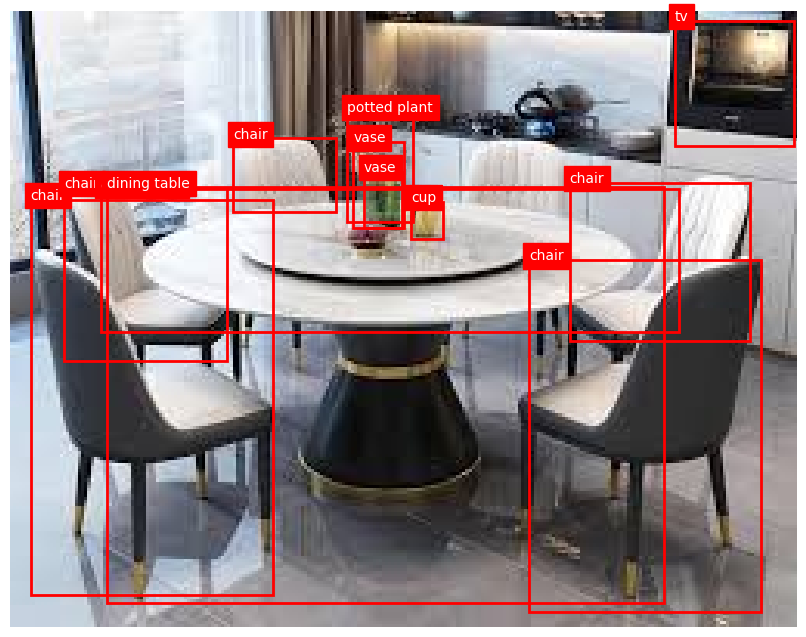

In [22]:
# Upload an image
uploaded = files.upload()
# Process the uploaded image
for image_path in uploaded.keys():
    image_tensor = load_image(image_path)
    predictions = detect_objects(model, image_tensor)
    summary_df = generate_summary(predictions)

    print("Summary Table:")
    print(summary_df)

    display_image_with_boxes(image_path, predictions)

Saving img 3.jpg to img 3.jpg
Summary Table:
   Object     Score                                                Box
0    bird  0.993191  [382.4002685546875, 706.2894287109375, 592.802...
1    bird  0.983821  [754.732421875, 330.3520202636719, 878.8617553...
2   horse  0.924556  [140.96701049804688, 419.4289245605469, 291.26...
3    bird  0.920172  [437.2828674316406, 276.1711730957031, 608.680...
4     dog  0.881890  [636.9990234375, 431.70330810546875, 926.10052...
5   sheep  0.856757  [143.6905975341797, 665.4099731445312, 273.390...
6    bird  0.831556  [669.9088134765625, 357.39453125, 788.20007324...
7    bird  0.766765  [509.2027893066406, 656.8434448242188, 756.882...
8    bird  0.764265  [376.4094543457031, 698.1370239257812, 453.469...
9     cat  0.720653  [634.8392944335938, 420.9319763183594, 913.563...
10    dog  0.716977  [722.6119384765625, 575.6242065429688, 821.825...
11   bird  0.656422  [185.28028869628906, 335.6688232421875, 373.49...
12  zebra  0.628410  [247.828750

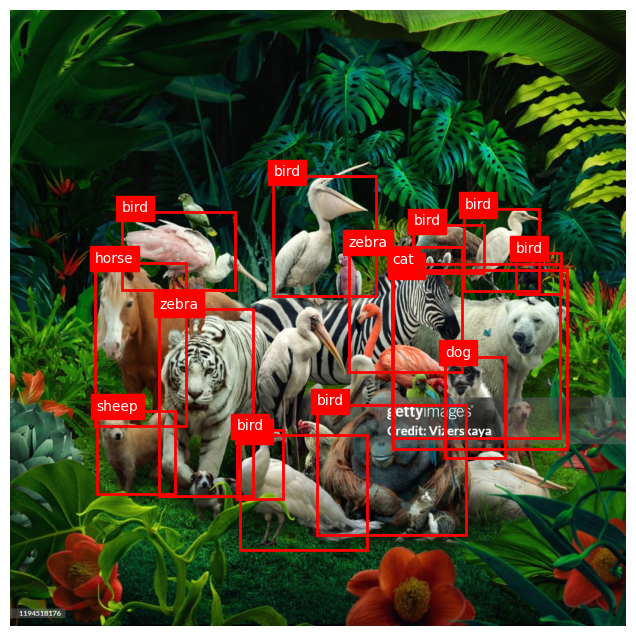

In [18]:
# Upload an image
uploaded = files.upload()
# Process the uploaded image
for image_path in uploaded.keys():
    image_tensor = load_image(image_path)
    predictions = detect_objects(model, image_tensor)
    summary_df = generate_summary(predictions)

    print("Summary Table:")
    print(summary_df)

    display_image_with_boxes(image_path, predictions)

Saving img 4.jpg to img 4.jpg
Summary Table:
      Object     Score                                                Box
0   broccoli  0.982802  [0.4174702763557434, 385.5486145019531, 107.02...
1     banana  0.942356  [255.40003967285156, 139.74781799316406, 420.0...
2     carrot  0.931839  [92.49345397949219, 438.9359436035156, 225.188...
3   broccoli  0.931168  [648.9169921875, 11.78812313079834, 860.967773...
4     orange  0.919286  [54.472755432128906, 76.58145904541016, 140.64...
5     orange  0.917198  [97.62802124023438, 147.8473663330078, 169.350...
6      apple  0.901526  [600.1334838867188, 359.8004455566406, 681.234...
7      apple  0.900065  [702.9562377929688, 293.4416198730469, 775.811...
8      apple  0.889511  [833.2233276367188, 230.81446838378906, 918.18...
9     orange  0.885400  [758.44921875, 491.3492126464844, 824.03167724...
10     apple  0.881140  [593.8585815429688, 211.15872192382812, 933.40...
11     apple  0.847600  [769.5748291015625, 266.29278564453125, 849

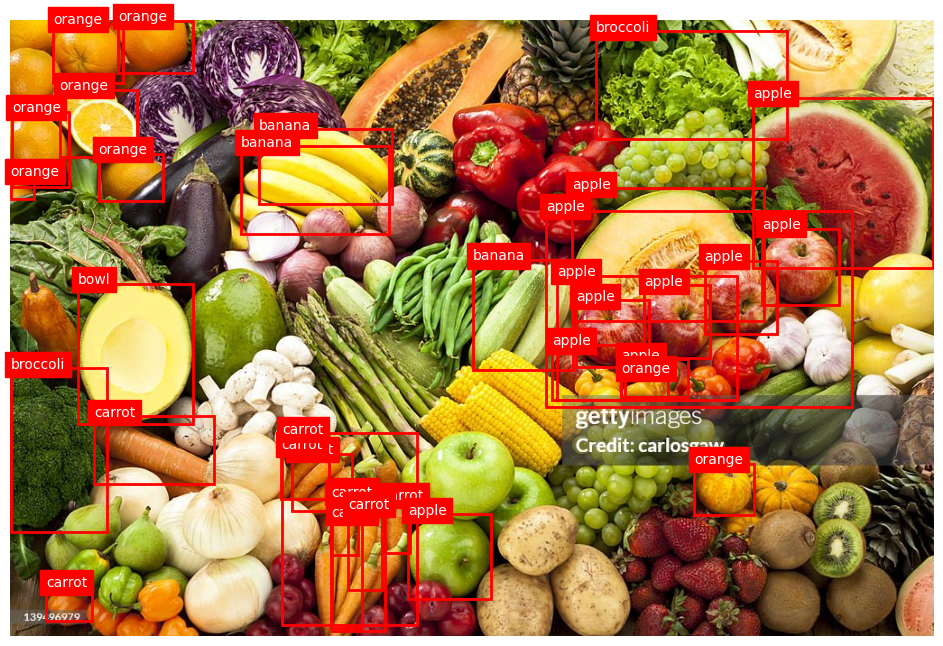

In [19]:
# Upload an image
uploaded = files.upload()
# Process the uploaded image
for image_path in uploaded.keys():
    image_tensor = load_image(image_path)
    predictions = detect_objects(model, image_tensor)
    summary_df = generate_summary(predictions)

    print("Summary Table:")
    print(summary_df)

    display_image_with_boxes(image_path, predictions)

Saving img 5.jpg to img 5 (2).jpg
Summary Table:
           Object     Score                                                Box
0             car  0.997705  [38.56808853149414, 229.43504333496094, 118.52...
1             car  0.997501  [26.88375473022461, 161.4113311767578, 59.3323...
2           truck  0.993157  [212.53334045410156, 157.64134216308594, 283.5...
3          person  0.991824  [144.82688903808594, 208.49497985839844, 160.6...
4             car  0.990321  [88.59559631347656, 155.67002868652344, 132.72...
5             car  0.987083  [62.8897819519043, 147.70379638671875, 91.2732...
6             car  0.960522  [292.24688720703125, 136.42127990722656, 310.4...
7             car  0.950125  [250.12867736816406, 98.54771423339844, 255.31...
8           truck  0.931394  [181.09840393066406, 139.7922821044922, 221.81...
9           truck  0.924919  [383.7388610839844, 149.45079040527344, 405.0,...
10            car  0.906714  [307.8788757324219, 177.9099884033203, 343.066...
11 

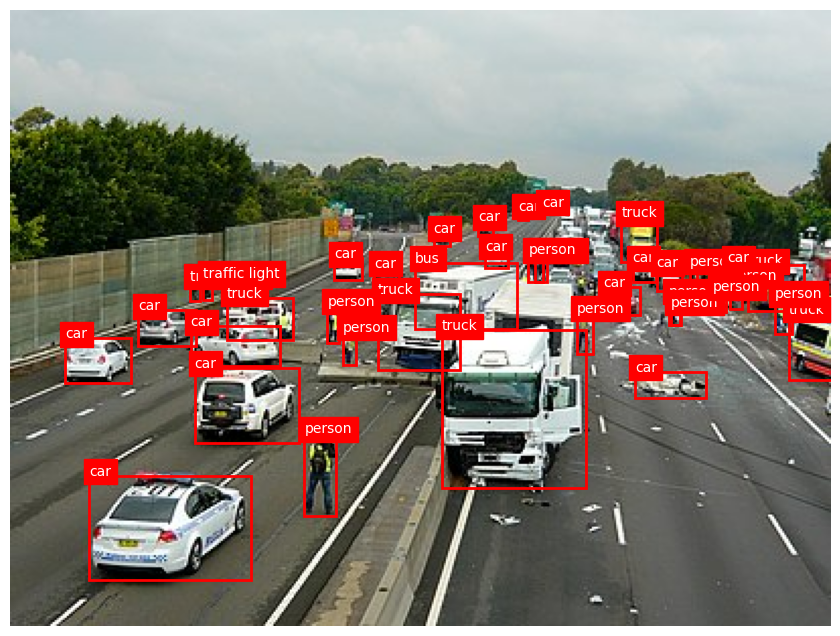

In [32]:
# Upload an image
uploaded = files.upload()
# Process the uploaded image
for image_path in uploaded.keys():
    image_tensor = load_image(image_path)
    predictions = detect_objects(model, image_tensor)
    summary_df = generate_summary(predictions)

    print("Summary Table:")
    print(summary_df)

    display_image_with_boxes(image_path, predictions)